In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 


In [2]:
pdf=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')

In [3]:
pdf.head()
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


In [ ]:
df=pd.read_csv('New_Algerian_and_Bejaia_dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4    RH          242 non-null    int64  
 5    Ws          242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


In [5]:
# We have to use New alerian dataset for feature selection and model training 
df.head(4)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,0


In [8]:
# we need to remove day , month and year from this datset because we don't need this
df.drop(['day'] ,axis=1)

,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
1,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
2,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0
3,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,0
4,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
238,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
239,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
240,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,0
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,0


In [20]:
df.drop(['month', 'day','year'] ,axis=1 ,inplace=True)

In [21]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  242 non-null    int64  
 1    RH          242 non-null    int64  
 2    Ws          242 non-null    int64  
 3   Rain         242 non-null    float64
 4   FFMC         242 non-null    float64
 5   DMC          242 non-null    float64
 6   DC           242 non-null    float64
 7   ISI          242 non-null    float64
 8   BUI          242 non-null    float64
 9   FWI          242 non-null    float64
 10  Classes      242 non-null    object 
 11  region       242 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.8+ KB


In [36]:
df.columns=df.columns.str.strip()

In [37]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region'],
      dtype='object')

In [41]:
df['Classes'].value_counts()

Classes
fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [50]:
# not we need to remove spaces from here also so, it wil identify as only tow different attributes
df['Classes']=df['Classes'].str.strip()

In [51]:
df['Classes'].value_counts()

Classes
fire        137
not fire    105
Name: count, dtype: int64

In [52]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,0


In [54]:
# now assigning 0 to not fire and 1 to fire

len(df['Classes'])

242

In [56]:
for i in range(len(df['Classes'])):
    if df['Classes'][i]=='not fire':
        df['Classes'][i]=0
    elif df['Classes'][i]=='fire':
        df['Classes'][i]=1

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
237    0
238    1
239    0
240    0
241    0
Name: Classes, Length: 242, dtype: object>

In [60]:
# plot the correlaton graph so, we can see that the relation between the graph
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651609,-0.283250,-0.326500,0.677620,0.487434,0.377906,0.606712,0.461594,0.569577,0.520083,-0.265203
RH,-0.651609,1.000000,0.244191,0.222338,-0.645061,-0.408947,-0.227252,-0.687833,-0.354264,-0.582056,-0.433655,0.406630
Ws,-0.283250,0.244191,1.000000,0.171489,-0.167860,-0.002771,0.077262,0.005587,0.029362,0.029374,-0.074460,0.178158
Rain,-0.326500,0.222338,0.171489,1.000000,-0.544092,-0.289149,-0.298407,-0.348228,-0.300264,-0.325183,-0.380503,0.043584
FFMC,0.677620,-0.645061,-0.167860,-0.544092,1.000000,0.603455,0.507168,0.740200,0.591856,0.691293,0.770379,-0.214601
DMC,0.487434,-0.408947,-0.002771,-0.289149,0.603455,1.000000,0.875765,0.679949,0.982226,0.875770,0.584982,-0.182771
DC,0.377906,-0.227252,0.077262,-0.298407,0.507168,0.875765,1.000000,0.507794,0.941912,0.739137,0.510195,0.088528
ISI,0.606712,-0.687833,0.005587,-0.348228,0.740200,0.679949,0.507794,1.000000,0.643465,0.922681,0.734358,-0.253887
BUI,0.461594,-0.354264,0.029362,-0.300264,0.591856,0.982226,0.941912,0.643465,1.000000,0.857801,0.585875,-0.079503
FWI,0.569577,-0.582056,0.029374,-0.325183,0.691293,0.875770,0.739137,0.922681,0.857801,1.000000,0.718236,-0.187036


<Axes: >

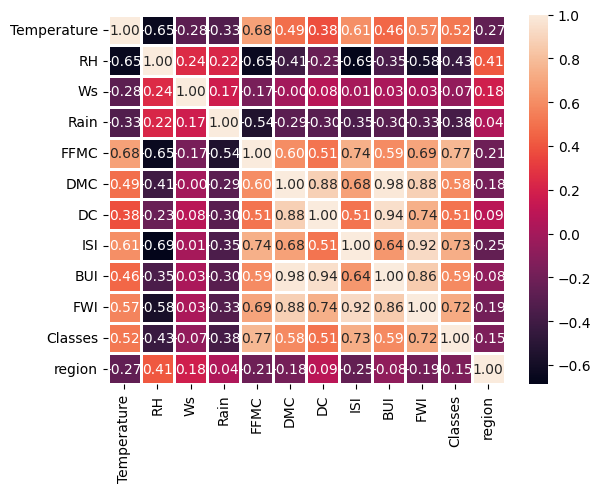

In [68]:
sb.heatmap(df.corr(), annot=True , linewidths=1 , fmt=".2f")

In [69]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])> threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
  

In [72]:
redundant_column=correlation(df, 0.8)

In [73]:
print(redundant_column)

{'DC', 'BUI', 'FWI'}


In [75]:
# now we need to remove this folder from teh dataset to get correct
df.drop(['DC' , 'BUI' , 'FWI'] ,axis=1,inplace=True)

In [76]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
0,32,71,12,0.7,57.1,2.5,0.6,0,0
1,30,73,13,4.0,55.7,2.7,0.6,0,0
2,29,80,14,2.0,48.7,2.2,0.3,0,0
3,30,64,14,0.0,79.4,5.2,2.2,0,0
4,32,60,14,0.2,77.1,6.0,1.8,0,0


In [ ]:
# 